In [90]:
pip install matplotlib seaborn


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
import requests
from bs4 import BeautifulSoup
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [92]:
def connect_to_database():
    return mysql.connector.connect(
        host="khushiconfecciones.com",
        database="u506324710_deportivo",
        user="u506324710_Daviddeportivo",
        password="Tamedotothepa1$",
        charset='utf8mb4'  # Especifica el uso de UTF-8
    )


In [93]:
def run_query(query):
    db = connect_to_database()  # Conecta a la base de datos
    cursor = db.cursor()        # Crea un cursor para ejecutar comandos SQL
    cursor.execute(query)       # Ejecuta la consulta SQL proporcionada
    
    # Recupera todos los resultados de la consulta
    result = cursor.fetchall()
    
    # Recupera los nombres de las columnas
    columns = [desc[0] for desc in cursor.description]
    
    cursor.close()              # Cierra el cursor
    db.close()                  # Cierra la conexión a la base de datos
    
    # Convierte los resultados en un DataFrame de Pandas
    return pd.DataFrame(result, columns=columns)

In [94]:
query1 = """
SELECT * FROM VistaPartidos
"""


In [95]:
df1 = run_query(query1)

## Rendimiento de los equipos 

ddddd

In [96]:
query2 = """
SELECT equipo, SUM(victorias) AS partidos_ganados, SUM(empates) AS 
partidos_empatados, SUM(derrotas) AS partidos_perdidos FROM ( SELECT
nombre_equipo_local AS equipo, (goles_local > goles_equipo_visitante) AS victorias,
(goles_local = goles_equipo_visitante) AS empates, (goles_local < goles_equipo_visitante) 
AS derrotas FROM VistaPartidos WHERE id_torneo BETWEEN 8 AND 13 UNION ALL SELECT nombre_equipo_visitante AS equipo, 
(goles_equipo_visitante > goles_local) AS victorias, (goles_equipo_visitante = goles_local) 
AS empates, (goles_equipo_visitante < goles_local) AS derrotas FROM VistaPartidos   WHERE id_torneo BETWEEN 8 AND 13) AS subconsulta  GROUP BY equipo ORDER BY partidos_ganados DESC;
"""

In [97]:
df2 = run_query(query2)
df2

,equipo,partidos_ganados,partidos_empatados,partidos_perdidos
0,Bayern,141,32,31
1,B. Dortmund,127,34,44
2,RB Leipzig,112,50,42
3,Leverkusen,112,40,52
4,Wolfsburgo,81,49,74
5,B. MGladbach,78,55,71
6,Eintracht Fr.,77,66,61
7,Friburgo,75,58,70
8,Hoffenheim,75,50,80
9,Unión Berlín\r\n,68,40,61


) missing from font(s) DejaVu Sans.pykernel_7620\845859637.py:22: UserWarning: Glyph 13 (
  plt.tight_layout()  # Ajusta el diseño para que no se corten las etiquetas
) missing from font(s) DejaVu Sans.lwebscrapp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


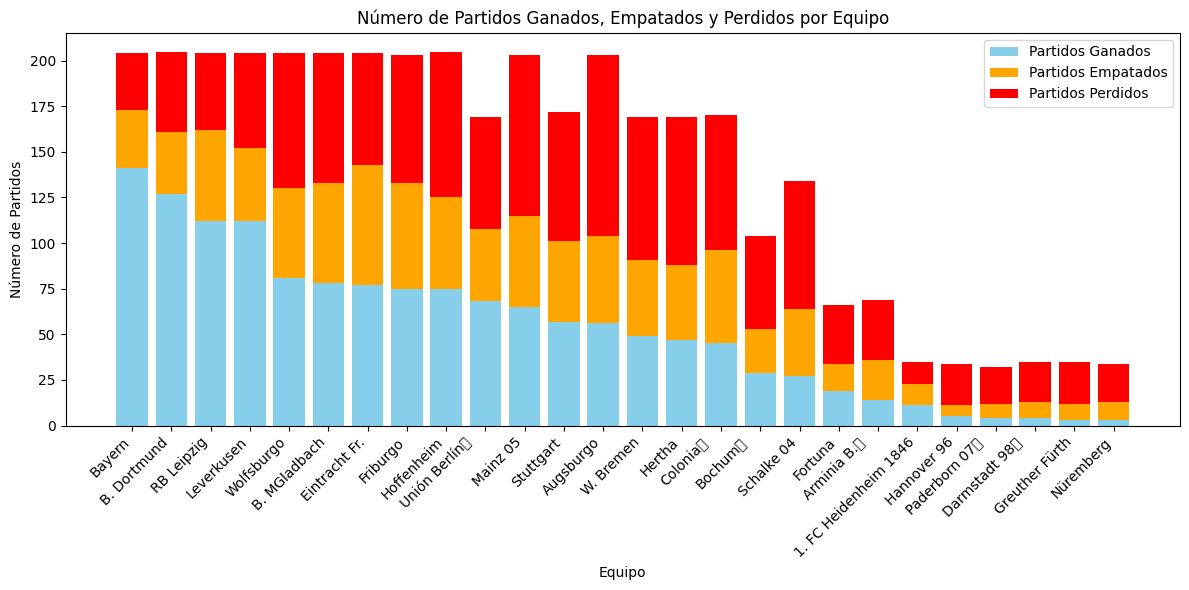

In [98]:
import matplotlib.pyplot as plt

# Supongamos que df2 es el DataFrame que has obtenido
# df2 = run_query(query2)

# Crear el diagrama de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura si es necesario

# Configura las barras
plt.bar(df2['equipo'], df2['partidos_ganados'], color='skyblue', label='Partidos Ganados')
plt.bar(df2['equipo'], df2['partidos_empatados'], color='orange', bottom=df2['partidos_ganados'], label='Partidos Empatados')
plt.bar(df2['equipo'], df2['partidos_perdidos'], color='red', bottom=df2['partidos_ganados'] + df2['partidos_empatados'], label='Partidos Perdidos')

# Configura los ejes y el título
plt.xlabel('Equipo')
plt.ylabel('Número de Partidos')
plt.title('Número de Partidos Ganados, Empatados y Perdidos por Equipo')
plt.xticks(rotation=45, ha='right')  # Rote los nombres de los equipos si es necesario
plt.legend()

# Muestra el gráfico
plt.tight_layout()  # Ajusta el diseño para que no se corten las etiquetas
plt.show()


In [99]:
queryELO = """
SELECT * FROM vista_elo;
"""

In [100]:
dfELO= run_query(queryELO)
dfELO

,id,id_partido,id_local,id_visitante,elo_local_antes,elo_local_despues,elo_visitante_antes,elo_visitante_despues,Equipo_local,Equipo_visitante
0,299,35517,2,15,None,1934,None,1762,Medellín,Once Caldas
1,322,35540,2,3,None,1926,None,1867,Medellín,América
2,341,35559,2,13,None,1919,None,1879,Medellín,Bucaramanga
3,359,35577,2,5,None,1932,None,1858,Medellín,Nacional
4,288,35506,3,9,None,1846,None,1795,América,Alianza Petrolera
...,...,...,...,...,...,...,...,...,...,...
454,449,35667,174,168,None,2162,None,2292,Salernitana\r\n,Verona\r\n
455,387,35605,177,159,None,2228,None,2458,Monza\r\n,Nápoles
456,408,35626,177,155,None,2239,None,2421,Monza\r\n,Atalanta
457,422,35640,177,149,None,2244,None,2421,Monza\r\n,Lazio


In [148]:
# Consulta SQL
# Consulta SQL
queryEvolucionElo = """
SELECT 
    Equipo_local AS Equipo,
    id_local AS id_equipo,
    elo_local_despues AS elo_despues,
    id_partido
FROM 
    vista_elo 
WHERE 
    id_local = 17

UNION ALL

SELECT 
    Equipo_visitante AS Equipo,
    id_visitante AS id_equipo,
    elo_visitante_despues AS elo_despues,
    id_partido
FROM 
    vista_elo 
WHERE 
    id_visitante = 17

ORDER BY 
    id_partido ASC;
"""


# Ejecutar consulta y mostrar resultados
dfEvolucionElo = run_query(queryEvolucionElo)
print(dfEvolucionElo)

    Equipo  id_equipo  elo_despues  id_partido
0  Pereira         17         1770       35511
1  Pereira         17         1776       35521
2  Pereira         17         1789       35525
3  Pereira         17         1783       35539
4  Pereira         17         1775       35543
5  Pereira         17         1783       35557
6  Pereira         17         1792       35567
7  Pereira         17         1804       35572
8  Pereira         17         1797       35591


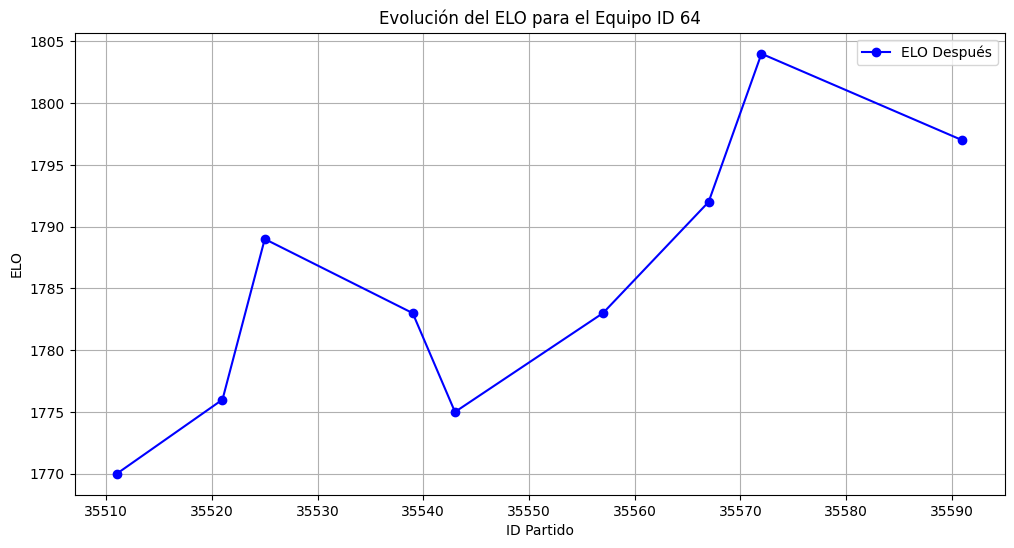

In [149]:
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar ELO después del partido
plt.plot(dfEvolucionElo['id_partido'], dfEvolucionElo['elo_despues'], marker='o', linestyle='-', color='blue', label='ELO Después')

# Configurar etiquetas y leyenda
plt.xlabel('ID Partido')
plt.ylabel('ELO')
plt.title('Evolución del ELO para el Equipo ID 64')
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()

In [150]:
# Consulta SQL
queryEvolucionElo = """
SELECT 
    v.Equipo,
    v.id_equipo,
    v.elo_despues,
    v.id_partido,
    id_torneo
FROM 
    (
        SELECT 
            Equipo_local AS Equipo,
            id_local AS id_equipo,
            elo_local_despues AS elo_despues,
            id_partido
        FROM 
            vista_elo 
        WHERE 
            id_partido BETWEEN 35500 AND 35580

        UNION ALL

        SELECT 
            Equipo_visitante AS Equipo,
            id_visitante AS id_equipo,
            elo_visitante_despues AS elo_despues,
            id_partido
        FROM 
            vista_elo 
        WHERE 
            id_partido BETWEEN 35500 AND 35580
    ) v
INNER JOIN 
    Partidos
ON 
    Partidos.id_partido = v.id_partido



where id_torneo=16
 AND v.id_equipo IN (12, 17)
ORDER BY 
    v.id_partido ASC;
"""
# Ejecutar consulta y mostrar resultados
dfEvolucionElo = run_query(queryEvolucionElo)
print(dfEvolucionElo)

        Equipo  id_equipo  elo_despues  id_partido  id_torneo
0   La Equidad         12         1797       35503         16
1      Pereira         17         1770       35511         16
2   La Equidad         12         1807       35515         16
3      Pereira         17         1776       35521         16
4   La Equidad         12         1798       35523         16
5      Pereira         17         1789       35525         16
6   La Equidad         12         1791       35533         16
7      Pereira         17         1783       35539         16
8      Pereira         17         1775       35543         16
9   La Equidad         12         1784       35551         16
10     Pereira         17         1783       35557         16
11  La Equidad         12         1793       35561         16
12     Pereira         17         1792       35567         16
13  La Equidad         12         1803       35568         16
14     Pereira         17         1804       35572         16


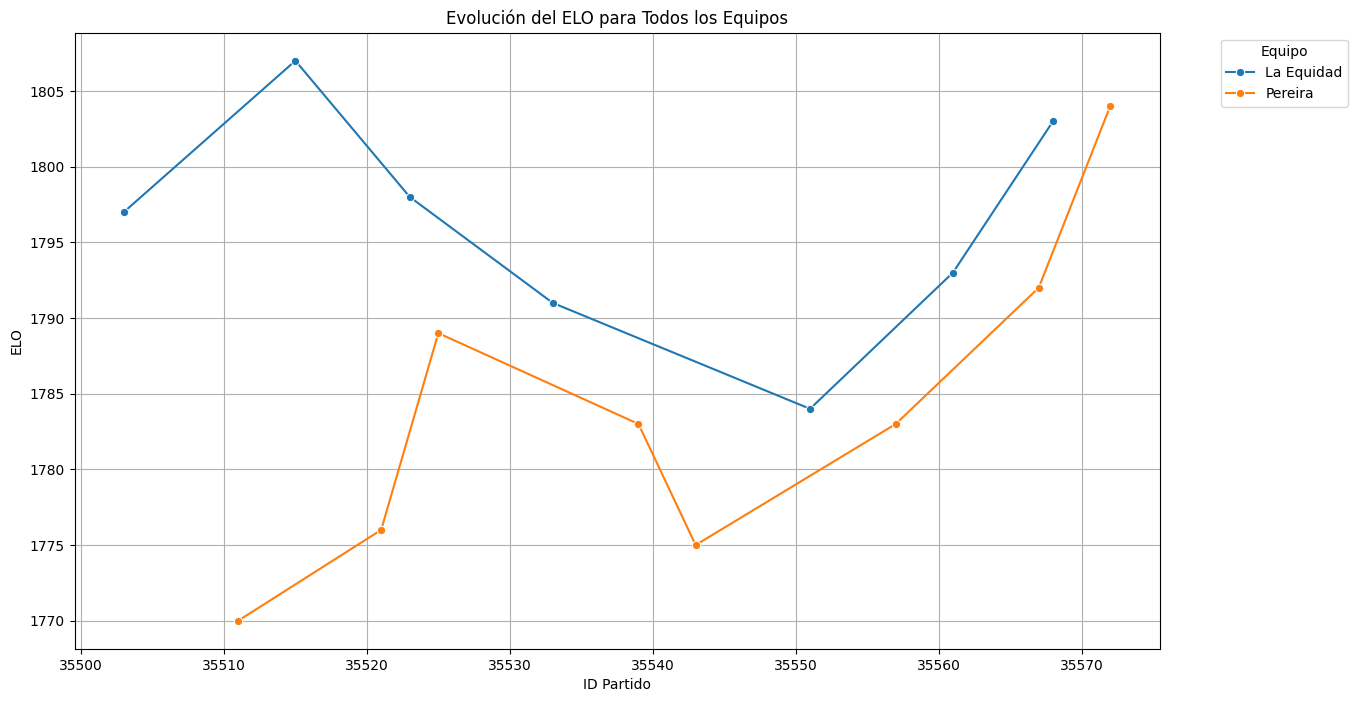

In [142]:
import seaborn as sns

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Graficar ELO después del partido para todos los equipos
sns.lineplot(data=dfEvolucionElo, x='id_partido', y='elo_despues', hue='Equipo', marker='o')

# Configurar etiquetas y leyenda
plt.xlabel('ID Partido')
plt.ylabel('ELO')
plt.title('Evolución del ELO para Todos los Equipos')
plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Mostrar gráfico
plt.show()


In [ ]:
import requests
from bs4 import BeautifulSoup
import mysql.connector
from datetime import datetime
import re

def insertar_goleadores(cursor, conn, partido_id, scorers, equipo):
    for scorer in scorers:
        cursor.execute(
            'INSERT INTO goles (partido_id, jugador, equipo, minuto_marcaje) VALUES (%s, %s, %s, NULL)',
            (partido_id, scorer, equipo)
        )
    conn.commit()

# Año que deseas procesar
year = 2024
id_tabla_partido = 10000

# Iterar sobre un rango del 1 al 30 ---- jornada
for numero in range(1, 30):
    # Construir la URL dinámicamente usando f-string
    url = f'https://colombia.as.com/resultados/futbol/italia/2023_2024/jornada/regular_a_{numero}'

    # Realizamos una solicitud HTTP GET a la URL
    response = requests.get(url)

    # Verificamos que la solicitud fue exitosa
    if response.status_code == 200:
        # Parseamos el contenido HTML de la página con BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extraemos la información de los partidos
        partidos = []
        partidosConURL = []
        for partido in soup.find_all('li', class_='list-resultado'):
            # Nombre del equipo local
            local = partido.find('div', class_='equipo-local').find('span', class_='nombre-equipo').text

            # Resultado del partido
            resultado_str = partido.find('div', class_='cont-resultado').find('a', class_='resultado').text.strip()
            partido_url = partido.find('div', class_='cont-resultado').find('a', class_='resultado')['href']
            goles_local, goles_visitante = resultado_str.split('-')

            # Convertir los goles a enteros
            goles_local = int(goles_local.strip())
            goles_visitante = int(goles_visitante.strip())

            # Nombre del equipo visitante
            visitante = partido.find('div', class_='equipo-visitante').find('span', class_='nombre-equipo').text

            # Fecha del partido
            fecha_str = partido.find('div', class_='info-evento').find('span', class_='fecha').text.strip()

            # Utilizamos expresiones regulares para identificar el formato correcto de fecha
            match = re.search(r'([A-Z])-(\d{2}/\d{2} \d{2}:\d{2})', fecha_str)
            if match:
                dia_semana = match.group(1)
                fecha_hora = match.group(2)
                fecha_str_con_año = f'{year} {fecha_hora}'

                try:
                    fecha = datetime.strptime(fecha_str_con_año, '%Y %d/%m %H:%M')
                except ValueError as e:
                    print(f'Error al convertir fecha {fecha_str_con_año}: {e}')
                    continue
            else:
                print(f'Formato de fecha no reconocido para {fecha_str}')
                continue

            # Agregamos la información del partido a la lista
            partidos.append((id_tabla_partido, local, goles_local, goles_visitante, visitante, fecha))
            partidosConURL.append((id_tabla_partido, local, goles_local, goles_visitante, visitante, fecha, partido_url))
            id_tabla_partido += 1

            # Imprimir los datos del partido para verificar
            print(f'Partido: {local} {goles_local} - {goles_visitante} {visitante} {fecha} {partido_url}')

        # Conectamos a la base de datos MySQL
        conn = mysql.connector.connect(
            host='localhost',
            port=3310,
            user='root',
            password='',
            database='world_population_data'
        )
        cursor = conn.cursor()

        # Creamos la tabla si no existe
        cursor.execute('''
        CREATE TABLE IF NOT EXISTS partidos (
            id INT primary key,
            local VARCHAR(255),
            goles_local INT,
            goles_visitante INT,
            visitante VARCHAR(255),
            fecha DATETIME
        )
        ''')

        # Eliminar datos solo en la primera iteración
        if numero == 1:
            cursor.execute('DELETE FROM goles')
            cursor.execute('DELETE FROM partidos')

        # Insertamos los datos en la tabla
        cursor.executemany(
            'INSERT INTO partidos (id, local, goles_local, goles_visitante, visitante, fecha) VALUES (%s,%s, %s, %s, %s, %s)',
            partidos)

        # Confirmamos los cambios
        conn.commit()
        conn.close()
        print('Datos insertados exitosamente en la base de datos.')

        # Realizamos el scraping adicional para cada partido
        conn = mysql.connector.connect(
            host='localhost',
            port=3310,
            user='root',
            password='',
            database='world_population_data'
        )
        cursor = conn.cursor()

        # Creamos la tabla si no existe
        cursor.execute('''
        CREATE TABLE IF NOT EXISTS goles (
            id INT AUTO_INCREMENT PRIMARY KEY,
            partido_id INT,
            jugador VARCHAR(255),
            equipo VARCHAR(255),
            minuto_marcaje INT,
            FOREIGN KEY (partido_id) REFERENCES partidos(id)
        )
        ''')

        # Procesamos cada partido para obtener los goleadores
        for partido_data in partidosConURL:
            partido_id = partido_data[0]
            partido_url = partido_data[6]
            response_partido = requests.get(partido_url)

            if response_partido.status_code == 200:
                soup_partido = BeautifulSoup(response_partido.content, 'html.parser')

                try:
                    # Extraer goleadores locales
                    local_scorers_tag = soup_partido.find('div', class_='scr-hdr__team is-local').find('div', class_='scr-hdr__scorers')
                    if local_scorers_tag:
                        local_scorers = [scorer.text.strip() for scorer in local_scorers_tag.find_all('span')]
                    else:
                        local_scorers_tag = soup_partido.find('div', class_='team team-b').find('div', class_='scorers')
                        if local_scorers_tag:
                            local_scorers = [scorer.text.strip() for scorer in local_scorers_tag.find_all('span')]
                        else:
                            local_scorers = []

                    if local_scorers:
                        insertar_goleadores(cursor, conn, partido_id, local_scorers, partido_data[1])
                    else:
                        print(f"No se encontraron goleadores locales en {partido_url}")

                except AttributeError:
                    print(f"Error al extraer goleadores locales en {partido_url}")

                try:
                    # Extraer goleadores visitantes
                    visitante_scorers_tag = soup_partido.find('div', class_='scr-hdr__team is-visitor').find('div',
                                                                                                             class_='scr-hdr__scorers')
                    visitante_scorers_tag_2 = soup.find_all('div', class_='team team-b')




                    if visitante_scorers_tag:
                        visitante_scorers = [scorer.text.strip() for scorer in visitante_scorers_tag.find_all('span')]

                    elif visitante_scorers_tag_2:
                        for team in visitante_scorers_tag_2:

                            scorers_div = team.find('div', class_='scorers').text.strip()
                            print(scorers_div)
                            if scorers_div:
                                # Iterar sobre los <span> dentro del div de anotadores
                                visitante_scorers = [scorer.text.strip() for scorer in scorers_div.find_all('span')]


                           # print(f"Equipo: {team_name} ({team_abbr})")
                           # print(f"Logo: {team_logo}")
                           # print(f"Puntaje: {team_score}")

                           # print(f"Anotadores: {scorers}")

                            #print("-" * 40)

                    else:
                        visitante_scorers = []

                    if visitante_scorers:
                        insertar_goleadores(cursor, conn, partido_id, visitante_scorers, partido_data[4])
                        print(f'Goleadores registrados para el partido ID {partido_id} ' + f'{partido_url}')
                    else:
                        print(f"No se encontraron goleadores visitantes en {partido_url}")

                except AttributeError:
                    print(f"Error al extraer goleadores visitantes en {partido_url}")



            else:
                print(f'Error al realizar la solicitud para {partido_url}: {response_partido.status_code}')

        # Cerramos la conexión a la base de datos 'goles'
        conn.close()

    else:
        print(f'Error al realizar la solicitud: {response.status_code}')


Partido: Empoli 0 - 1 Verona 2024-08-19 11:30:00 https://colombia.as.com/resultados/futbol/italia/2023_2024/directo/regular_a_1_444160/
Partido: Frosinone 1 - 3 Nápoles 2024-08-19 11:30:00 https://as.com/futbol/internacional/frosinone-napoles-en-directo-n/
Partido: Inter 2 - 0 Monza 2024-08-19 13:45:00 https://colombia.as.com/futbol/colombianos-por-el-mundo/cuadrado-debuta-en-la-victoria-del-inter-ante-monza-n/
Partido: Genoa 1 - 4 Fiorentina 2024-08-19 13:45:00 https://colombia.as.com/resultados/futbol/italia/2023_2024/directo/regular_a_1_444161/
Partido: Sassuolo 0 - 2 Atalanta 2024-08-20 11:30:00 https://colombia.as.com/futbol/colombianos-por-el-mundo/duvan-zapata-presente-en-el-inicio-de-la-serie-a-con-atalanta-n/
Partido: Roma 2 - 2 Salernitana 2024-08-20 11:30:00 https://as.com/futbol/internacional/belotti-renace-y-salva-a-mou-n/
Partido: Lecce 2 - 1 Lazio 2024-08-20 13:45:00 https://colombia.as.com/resultados/futbol/italia/2023_2024/directo/regular_a_1_444156/
Partido: Udinese 0

## Informe de errores
Procedimientos que tienen como objetivo ajustar y corregir el modelo


### Partidos repetidos 
En ocasiones ocurre que se hace doble insert de un mismo partido, estos errores perjudican la precision ddel modelo hay que depurar y hacer las correcciones del caso


In [106]:
Query_repetidos="""
SELECT id_partido, fecha_partido, estadisticas, id_torneo, goles_equipo_visitante,
goles_local, id_equipo_local, id_equipo_visitante, ganador, fecha_registroBD, COUNT(*) AS cantidad FROM Partidos GROUP BY fecha_partido,
estadisticas, id_torneo, goles_equipo_visitante, goles_local, id_equipo_local, id_equipo_visitante, ganador, fecha_registroBD HAVING COUNT(*) > 1;"""